In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
base_utils_path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'Base'))
if base_utils_path not in sys.path:
    sys.path.append(base_utils_path)
from utils import generate_combinations
import pandas as pd

base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'Base'))
if base_dir not in sys.path:
    sys.path.append(base_dir)

from Combo_CC_Base import Combo_CC

In [2]:
prod_x = prod_y = ['1','x','y']
rem_x = rem_y = ['1','x','y','x*y','x^2','y^2']
lists = [prod_x,rem_x,prod_y,rem_y]
k_values = [3,1,0,1]

df = generate_combinations(lists, k_values,['prod_x','rem_x','prod_y','rem_y'])
remarks = ['' for i in range(len(df))]
df['remarks'] = remarks
# Print the DataFrame
print(df.to_string())


   prod_x_item_1 prod_x_item_2 prod_x_item_3 rem_x_item_1 rem_y_item_1 remarks
0              1             x             y            1            1        
1              1             x             y            1            x        
2              1             x             y            1            y        
3              1             x             y            1          x*y        
4              1             x             y            1          x^2        
5              1             x             y            1          y^2        
6              1             x             y            x            1        
7              1             x             y            x            x        
8              1             x             y            x            y        
9              1             x             y            x          x*y        
10             1             x             y            x          x^2        
11             1             x             y        

In [5]:
remarks = ['' for i in range(len(df))]
for i in range(len(df)):
    prod_x_set = {df.iloc[i]['prod_x_item_1'],df.iloc[i]['prod_x_item_2'],df.iloc[i]['prod_x_item_3']}
    rem_x_set = {df.iloc[i]['rem_x_item_1']}
    rem_y_set = {df.iloc[i]['rem_y_item_1']}
    x_set = rem_x_set.union(prod_x_set)
    y_set = rem_y_set
    if rem_x_set.issubset(prod_x_set):
        if not 'zero behaviour of x at origin,' in remarks[i]:
            remarks[i] += 'zero behaviour of x at origin,'
    if y_set.issubset({'x','x*y','x^2'}):
        if not 'x=0 is a line of fixed points' in remarks[i]:
                remarks[i] += 'x=0 is a line of fixed points,'
    if not(('y' in x_set) or ('y^2' in x_set) or ('x*y' in x_set)):
        if not (('x' in y_set) or ('x^2' in y_set) or ('x*y' in y_set)):
            if not 'not connected' in remarks[i]:
                remarks[i] += 'not connected,'
    elif not (('x' in y_set) or ('x^2' in y_set) or ('x*y' in y_set)):
        remarks[i]+= 'no feedback,'
df['remarks']=remarks
print(df.to_string())
print(len(df[df['remarks']=='']))

   prod_x_item_1 prod_x_item_2 prod_x_item_3 rem_x_item_1 rem_y_item_1                                                       remarks
0              1             x             y            1            1                    zero behaviour of x at origin,no feedback,
1              1             x             y            1            x  zero behaviour of x at origin,x=0 is a line of fixed points,
2              1             x             y            1            y                    zero behaviour of x at origin,no feedback,
3              1             x             y            1          x*y  zero behaviour of x at origin,x=0 is a line of fixed points,
4              1             x             y            1          x^2  zero behaviour of x at origin,x=0 is a line of fixed points,
5              1             x             y            1          y^2                    zero behaviour of x at origin,no feedback,
6              1             x             y            x            

In [6]:
remarks = df['remarks'].copy()
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        if not {'1'}.issubset(rem_x_set):
            remarks[i] += '0 is not stable,'
df['remarks']=remarks
print(df.to_string())

   prod_x_item_1 prod_x_item_2 prod_x_item_3 rem_x_item_1 rem_y_item_1                                                       remarks
0              1             x             y            1            1                    zero behaviour of x at origin,no feedback,
1              1             x             y            1            x  zero behaviour of x at origin,x=0 is a line of fixed points,
2              1             x             y            1            y                    zero behaviour of x at origin,no feedback,
3              1             x             y            1          x*y  zero behaviour of x at origin,x=0 is a line of fixed points,
4              1             x             y            1          x^2  zero behaviour of x at origin,x=0 is a line of fixed points,
5              1             x             y            1          y^2                    zero behaviour of x at origin,no feedback,
6              1             x             y            x            

[36. 36. 18.  9.  0.  0.]


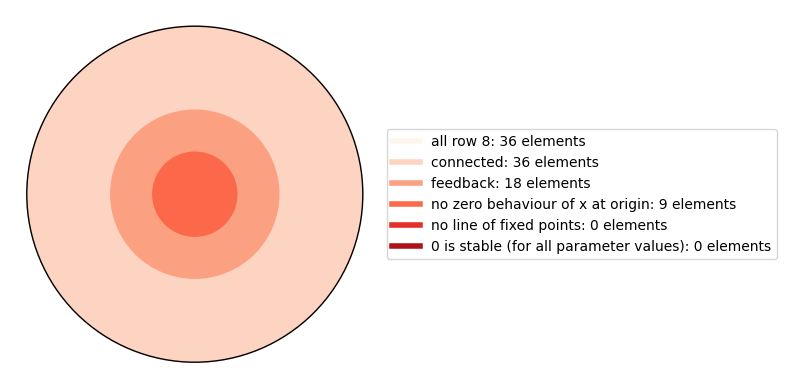

In [8]:
remarks = ['not connected','no feedback','zero behaviour of x at origin','line of fixed points','0 is not stable']
lengths = np.zeros(len(remarks)+1)
lengths[0] = len(df)
df_remain = df
for i,remark in enumerate(remarks):
    df_remain = df_remain[~df_remain['remarks'].str.contains(remark, case=False, na=False)]
    lengths[i+1] = len(df_remain)
print(lengths)
from utils import draw_filtration_circles
labels = ['all row 8','connected','feedback','no zero behaviour of x at origin','no line of fixed points','0 is stable (for all parameter values)']
fig,ax = draw_filtration_circles(lengths,labels,True,cmap = 'Reds')
fig.savefig('figures/row8/venn_diagram.png',dpi = 200,bbox_inches = 'tight')

In [ ]:
df.to_csv('../data/row8.csv')